In [4]:
import pandas as pd

In [5]:
import math

In [37]:
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("titanic.csv")

In [20]:
df[df['PassengerId'] == 528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [23]:
i = 0
for person in df['Name']:
    if "Fannie" in person:
        break
    i += 1
df.loc[i]

PassengerId                              707
Survived                                   1
Pclass                                     2
Name           Kelly, Mrs. Florence "Fannie"
Sex                                   female
Age                                     45.0
SibSp                                      0
Parch                                      0
Ticket                                223596
Fare                                    13.5
Cabin                                    NaN
Embarked                                   S
Name: 706, dtype: object

In [82]:
count = (df["Sex"] == "male").sum()
print(f"Male Passengers: {int(count / len(df) * 100)} %")

Male Passengers: 64 %


In [107]:
ticketData = pd.read_csv("titanic.csv")
tickets = {}
for i in ticketData['Pclass']:
    if(i in tickets):
        tickets[i] = tickets[i] + 1
    else:
        tickets[i] = 1
        
print("\n".join("{}\t{}".format(k, v) for k, v in tickets.items()))

3	491
1	216
2	184


In [115]:
passengerData = pd.read_csv("titanic.csv")
passengers = {}
for i in passengerData['Embarked']:
    if(i in passengers):
        passengers[i] = passengers[i] + 1
    else:
        passengers[i] = 1
        
for i in passengers.keys():
    print(f"{i} : {math.ceil((passengers[i] / len(passengerData) * 100))} %")

S : 73 %
C : 19 %
Q : 9 %
nan : 1 %


In [42]:
males = {"dead" : 0, "lived" : 0}
females = {"dead" : 0, "lived" : 0}
for i in range(len(df)):
    if df.loc[i]["Survived"] == 0 and df.loc[i]["Sex"] == "male":
        males["dead"] += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Sex"] == "male":
        males["lived"] += 1
    elif df.loc[i]["Survived"] == 0 and df.loc[i]["Sex"] == "female":
        females["dead"] += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Sex"] == "female":
        females["lived"] += 1
print (f"Males : {males}")
print (f"Females : {females}")

Males : {'dead': 468, 'lived': 109}
Females : {'dead': 81, 'lived': 233}


In [57]:
child = {"dead" : 0, "lived" : 0}
adult = {"dead" : 0, "lived" : 0}

for i in range(len(df)):
    if df.loc[i]["Survived"] == 0 and df.loc[i]["Age"] < 18:
        child["dead"] += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Age"] < 18:
        child["lived"] += 1
    elif df.loc[i]["Survived"] == 0 and df.loc[i]["Age"] >= 18:
        adult["dead"] += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Age"] >= 18:
        adult["lived"] += 1

totalChildren = child["dead"] + child["lived"]
for i in child.keys():
    print(f"Children - {i} : {math.ceil((child[i] / totalChildren) * 100)}% | Out of total {math.ceil((child[i] / len(df)) * 100)} %")
    
totalAdults = adult["dead"] + adult["lived"]
for i in adult.keys():
    print(f"Adults - {i} : {math.ceil((adult[i] / totalAdults) * 100)}% | Out of Total {math.ceil((adult[i] / len(df)) * 100)} %")

Children - dead : 47% | Total 6 %
Children - lived : 54% | Total 7 %
Adults - dead : 62% | Total 42 %
Adults - lived : 39% | Total 26 %


In [35]:
portSurvival = {}
portDied = {}
for i in range(len(df)):
    port = df.loc[i, 'Embarked']
    if not(port == "S" or port == "Q" or port == "C"):
        port = "nan"
    survived = df.loc[i, 'Survived']
    if survived == 1:
        if port in portSurvival.keys():
            portSurvival[port] += 1
        else:
            portSurvival[port] = 1
    else:
        if port in portDied.keys():
            portDied[port] += 1
        else:
            portDied[port] = 1
conTable = {
    "S" : [portSurvival["S"], portDied["S"], portSurvival["S"] + portDied["S"]],
    "Q" : [portSurvival["Q"], portDied["Q"], portSurvival["Q"] + portDied["Q"]],
    "C" : [portSurvival["C"], portDied["C"], portSurvival["C"] + portDied["C"]],
    "Total" : [portSurvival["S"] + portSurvival["Q"] + portSurvival["C"], 
               portDied["S"] + portDied["Q"] + portDied["C"],
               len(df)]
}
portDF = pd.DataFrame.from_dict(conTable)
portDF.index = ["Survived", "Died", "Total"]
portDF

,S,Q,C,Total
Survived,217,30,93,340
Died,427,47,75,549
Total,644,77,168,891


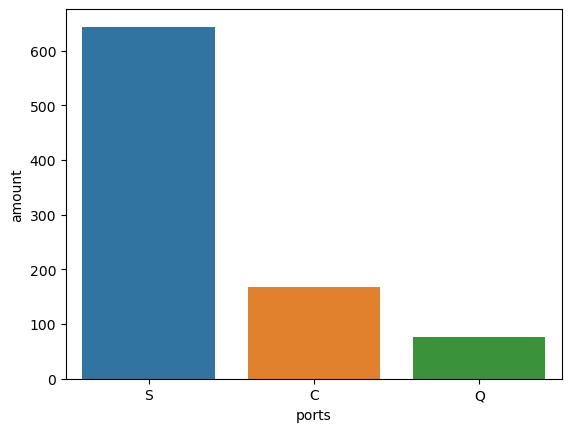

In [48]:
ports = {}
for i in df["Embarked"]:
    if i in ports:
        ports[i] += 1
    else:
        ports[i] = 1

graph = {
    "ports" : ports.keys(),
    "amount" : ports.values()
}

graphDF = pd.DataFrame(graph)
  
sns.barplot(x = "ports",
            y = "amount",
            data = graphDF)

plt.show()

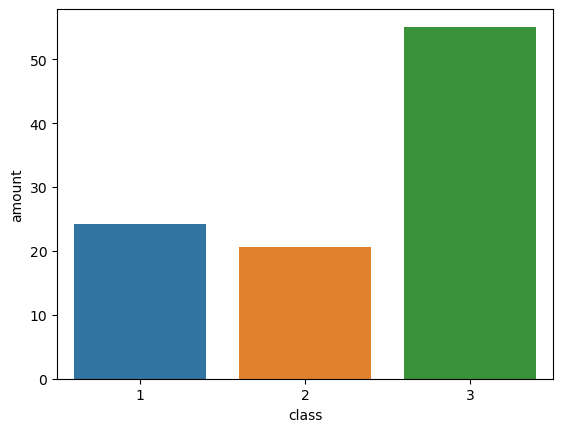

In [52]:
passengerClass = {}
for i in df["Pclass"]:
    if i in passengerClass:
        passengerClass[i] += 1 / len(df) * 100
    else:
        passengerClass[i] = 1 / len(df) * 100

graph = {
    "class" : passengerClass.keys(),
    "amount" : passengerClass.values()
}

graphDF = pd.DataFrame(graph)
  
sns.barplot(x = "class",
            y = "amount",
            data = graphDF)

plt.show()

<AxesSubplot:xlabel='City', ylabel='Survived'>

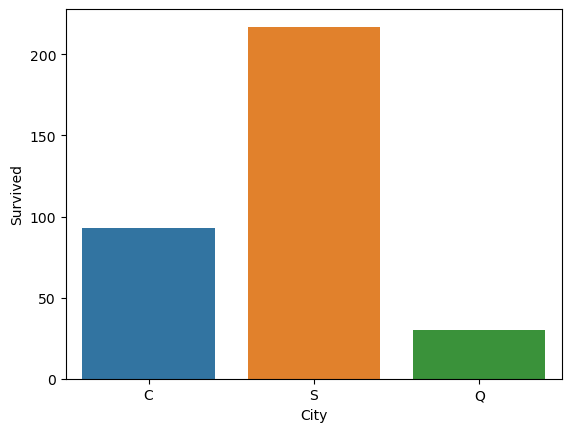

In [56]:
citySurvival = {"City" : ["C", "S", "Q"], "Survived" : [0, 0, 0]}
for i in range(len(df)):
    city = df.loc[i, "Embarked"]
    survived = df.loc[i, "Survived"]
    if city == "C":
        citySurvival["Survived"][0] += survived
    elif city == "S":
        citySurvival["Survived"][1] += survived
    elif city == "Q":
        citySurvival["Survived"][2] += survived
        
dataFrame = pd.DataFrame(citySurvival)
sns.barplot(x = "City",
            y = "Survived",
            data = dataFrame)

Text(9.444444444444445, 0.5, 'Count')

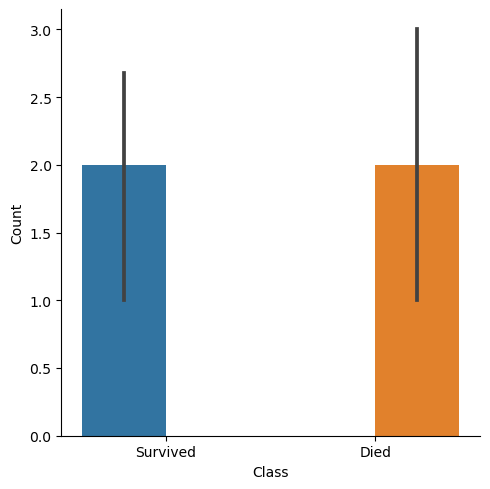

In [83]:
passengerClass = {"Class" : [1, 2, 3], "Survived" : [0, 0, 0], "Died" : [0, 0, 0]}
for i in range(len(df)):
    pclass = df.loc[i, "Pclass"]
    survived = df.loc[i, "Survived"]
    if survived:
        if pclass == 1:
            passengerClass["Survived"][0] += 1
        elif pclass == 2:
            passengerClass["Survived"][1] += 1
        elif pclass == 3:
            passengerClass["Survived"][2] += 1
    else:
        if pclass == 1:
            passengerClass["Died"][0] += 1
        elif pclass == 2:
            passengerClass["Died"][1] += 1
        elif pclass == 3:
            passengerClass["Died"][2] += 1

dataFrame = pd.DataFrame(passengerClass)
dataFrame = pd.melt(dataFrame, id_vars = "Class")
dataFrame = dataFrame.rename(columns={"variable" : "Survived"})
sns.catplot(x='Survived', y='Class', hue='Survived', 
            kind='bar', data=dataFrame) 
plt.xlabel("Class") 
plt.ylabel("Count") 

In [84]:
sexSuvival = {"Sex" : ["M", "F"], "Survived" : [0, 0], "Died" : [0,0]}
ageSuvival = {"age" : ["Child", "Adult"], "Survived" : [0, 0], "Died" : [0,0]}

for i in range(len(df)):
    sex = df.loc[i, "Sex"]
    age = df.loc[i, "Age"]
    survived = df.loc[i, "Survived"]
    if(survived == 1):
        if(sex == "male"):
            sexSuvival["Survived"][0] += 1
        else:
            sexSuvival["Survived"][1] += 1
        if(age <= 18):
            ageSuvival["Survived"][0] += 1
        else:
            ageSuvival["Survived"][1] += 1
    else:
        if(sex == "male"):
            sexSuvival["Died"][0] += 1
        else:
            sexSuvival["Died"][1] += 1
        if(age <= 18):
            ageSuvival["Died"][0] += 1
        else:
            ageSuvival["Died"][1] += 1

survivalChange = {
    sex = {"Male Lived" : sexSuvival["Survived"][0], "Male Died" : sexSuvival["Died"][0],
          "Female Lived" : sexSuvival["Survived"][1], "Female Died" : sexSuvival["Died"][1]}
}
dataFrame = pd.DataFrame()

    